In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,f1_score, accuracy_score, classification_report,confusion_matrix,classification_report

from sklearn.utils import shuffle
import pickle
# importing sys
import sys
# adding helper_func to the system path
sys.path.insert(0, '../helper_functions/')
# importing actual functions
from helper_functions import preds_N_cm

#from oversampler_funtion import over_sampler ### NEED TO IMPORT
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_columns", 100)



In [4]:
building = pd.read_csv("../../Data/Complete_N_Cleaned.csv")
building.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_used_in_risk,3,major_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_repaired_and_used,5,reconstruction,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,1,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [5]:
print('confirming no nulls: ',building.isnull().sum().sum())
building.dtypes

confirming no nulls:  0


building_id                                 int64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64


In [6]:
# prepping original data to dummify
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']
numdf = building.copy().select_dtypes(include=numerics)
catdf = building.copy().select_dtypes(include=categorical)
#catdf
catdf.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed,legal_ownership_status
0,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,damaged_used_in_risk,major_repair,private
1,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,damaged_repaired_and_used,reconstruction,private
2,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,damaged_repaired_and_used,minor_repair,private
3,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,damaged_repaired_and_used,minor_repair,private
4,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,damaged_repaired_and_used,minor_repair,private


In [7]:
# will dummify these to pass into models
dummified_1 = pd.get_dummies(data=catdf,drop_first=True) 
dummified_1 = pd.concat([numdf,dummified_1],axis=1)
print(dummified_1.shape)
dummified_1.head()

(762106, 72)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_moderate_slope,land_surface_condition_steep_slope,foundation_type_cement_stone_brick,foundation_type_mud_mortar_stone_brick,foundation_type_other,foundation_type_rc,roof_type_bamboo_timber_light_roof,roof_type_rcc_rb_rbc,ground_floor_type_mud,ground_floor_type_other,ground_floor_type_rc,ground_floor_type_timber,other_floor_type_rcc_rb_rbc,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_not_attached,plan_configuration_e_shape,plan_configuration_h_shape,plan_configuration_l_shape,plan_configuration_multi_projected,plan_configuration_others,plan_configuration_rectangular,plan_configuration_square,plan_configuration_t_shape,plan_configuration_u_shape,condition_post_eq_damaged_not_used,condition_post_eq_damaged_repaired_and_used,condition_post_eq_damaged_rubble_clear,condition_post_eq_damaged_rubble_clear_new_building_built,condition_post_eq_damaged_rubble_unclear,condition_post_eq_damaged_used_in_risk,condition_post_eq_not_damaged,technical_solution_proposed_minor_repair,technical_solution_proposed_no_need,technical_solution_proposed_reconstruction,legal_ownership_status_other,legal_ownership_status_private,legal_ownership_status_public
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,3,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,5,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,2,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,2,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [8]:
# prepping my training and testing batches double checking class balances
X = dummified_1.drop(columns = ['building_id','damage_grade']) 
y = dummified_1['damage_grade']-1
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
print(y_test.unique())
y_test.value_counts(normalize=True) # double checking that it was stratified 

[3 0 4 1 2]


4    0.361865
3    0.241231
2    0.178993
1    0.114493
0    0.103418
Name: damage_grade, dtype: float64

#### Important Note: I had to alter my class from 1-5 to 0-4 for the classifier below.
The baseline is 36%, since we have some pretty imbalanced classes thus our class 4 (grade 5).

In [9]:
%%time 
# instantiating first model (most of these are defaults)
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

CPU times: user 2min 46s, sys: 4.07 s, total: 2min 50s
Wall time: 2min 52s


RandomForestClassifier(random_state=42)

Accuracy: 89.87%

(micro) precision score:  0.8987440100353231         (macro) precision score:  0.8850513522750487
(micro) f1 score:  0.8987440100353231                (macro) f1 score:  0.8835778503677945

XGBoost Classificaition Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     19704
           1       0.83      0.84      0.83     21814
           2       0.81      0.79      0.80     34103
           3       0.84      0.90      0.87     45961
           4       0.99      0.96      0.98     68945

    accuracy                           0.90    190527
   macro avg       0.89      0.88      0.88    190527
weighted avg       0.90      0.90      0.90    190527



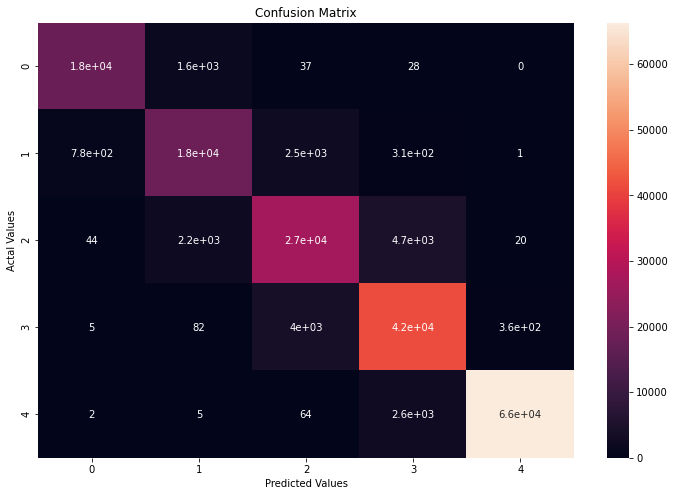

In [10]:
preds_N_cm(forest,X_train,y_train,X_test,y_test)

### defaults of random forest
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- n_estimators = number of trees in the foreset <br>
- max_features = max number of features considered for splitting a node <br>
- max_depth = max number of levels in each decision tree <br>
- min_samples_split = min number of data points placed in a node before the node is split <br>
- min_samples_leaf = min number of data points allowed in a leaf node <br>
- bootstrap = method for sampling data points (with or without replacement) <br>

In [14]:
%%time 
# instantiating first model (most of these are defaults)
pipe = Pipeline([

    ('model', RandomForestClassifier(random_state=42))    
])
# using default solver = lbfgs rest need to be altered b/c of convergence issues
hyper_params = {
    'model__n_estimators' : [10, 20, 100, 1_000], # chose 1 the first time and then can maybe try higher magnitude values
    'model__max_features':[2,5],
}
gs = GridSearchCV(pipe, hyper_params,cv=3)
gs.fit(X_train,y_train)
print('best overall accuracy score: ',gs.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best parameters: ',gs.best_params_)
print('train score',gs.score(X_train,y_train))
print('test score',gs.score(X_test,y_test))


best overall accuracy score:  0.8959496412165108
best parameters:  {'model__max_features': 5, 'model__n_estimators': 1000}
train score 0.9987000922007282
test score 0.897473848850819
CPU times: user 2h 6min 45s, sys: 9min 51s, total: 2h 16min 36s
Wall time: 2h 46min 39s


Accuracy: 89.75%

(micro) precision score:  0.897473848850819         (macro) precision score:  0.8841013134646971
(micro) f1 score:  0.897473848850819                (macro) f1 score:  0.8822125322625352

XGBoost Classificaition Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     19704
           1       0.82      0.84      0.83     21814
           2       0.80      0.79      0.80     34103
           3       0.84      0.91      0.87     45961
           4       0.99      0.96      0.98     68945

    accuracy                           0.90    190527
   macro avg       0.88      0.88      0.88    190527
weighted avg       0.90      0.90      0.90    190527



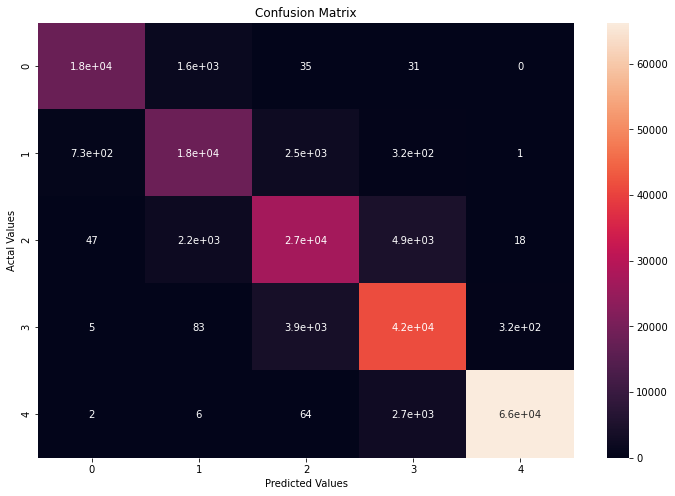

In [15]:
preds_N_cm(gs,X_train,y_train,X_test,y_test)